# **Car Accident Data**
The dataset provides detailed records of road accidents that occurred during January 2021. It includes information such as the accident date, day of the week, junction control, accident severity, geographical coordinates, lighting and weather conditions, vehicle details, and more. The data is valuable for analyzing and understanding the factors contributing to road accidents in this urban area, aiding in the development of strategies for improved road safety.

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import numpy as np
import pandas as pd
import os

filepath = '/content/gdrive/MyDrive/למידה חישובית/Road Accident Data.csv'
data = pd.read_csv(filepath)
print(data.shape)
data.head()

(307973, 21)


Accident_Index Accident Date Day_of_Week          Junction_Control  \
0  200901BS70001      1/1/2021    Thursday  Give way or uncontrolled   
1  200901BS70002      1/5/2021      Monday  Give way or uncontrolled   
2  200901BS70003      1/4/2021      Sunday  Give way or uncontrolled   
3  200901BS70004      1/5/2021      Monday       Auto traffic signal   
4  200901BS70005      1/6/2021     Tuesday       Auto traffic signal   

           Junction_Detail Accident_Severity   Latitude  \
0  T or staggered junction           Serious  51.512273   
1               Crossroads           Serious  51.514399   
2  T or staggered junction            Slight  51.486668   
3  T or staggered junction           Serious  51.507804   
4               Crossroads           Serious  51.482076   

        Light_Conditions Local_Authority_(District) Carriageway_Hazards  ...  \
0               Daylight     Kensington and Chelsea                 NaN  ...   
1               Daylight     Kensington and Chelsea                 NaN  ...   
2               Daylight     Kensington and Chelsea                 NaN  ...   
3               Daylight     Kensington and Chelsea                 NaN  ...   
4  Darkness - lights lit     Kensington and Chelsea                 NaN  ...   

   Number_of_Casualties  Number_of_Vehicles         Police_Force  \
0                     1                   2  Metropolitan Police   
1                    11                   2  Metropolitan Police   
2                     1                   2  Metropolitan Police   
3                     1                   2  Metropolitan Police   
4                     1                   2  Metropolitan Police   

  Road_Surface_Conditions           Road_Type Speed_limit   Time  \
0                     Dry      One way street          30  15:11   
1             Wet or damp  Single carriageway          30  10:59   
2                     Dry  Single carriageway          30  14:19   
3            Frost or ice  Single carriageway          30   8:10   
4                     Dry  Single carriageway          30  17:25   

  Urban_or_Rural_Area  Weather_Conditions           Vehicle_Type  
0               Urban  Fine no high winds                    Car  
1               Urban  Fine no high winds  Taxi/Private hire car  
2               Urban  Fine no high winds  Taxi/Private hire car  
3               Urban               Other  Motorcycle over 500cc  
4               Urban  Fine no high winds                    Car  

[5 rows x 21 columns]

In [ ]:
#The number of each Accident_Severity- the target
print(data["Accident_Severity"].value_counts())

Accident_Severity
Slight     263280
Serious     40740
Fatal        3904
Fetal          49
Name: count, dtype: int64


# Explanation:

**Accident_Index:** A unique identifier for each accident record.

**Accident Date:** The date on which the accident occurred (format: DD/MM/YYYY).

**Day_of_Week:** The day of the week when the accident took place.

**Junction_Control:** Describes the type of junction control at the accident location (e.g., "Give way or uncontrolled").

**Junction_Detail:** Provides additional details about the junction where the accident occurred (e.g., "T or staggered junction").

**Accident_Severity:** Indicates the severity of the accident (e.g., "Serious").

**Latitude:** The geographic latitude of the accident location.

**Light_Conditions:** Describes the lighting conditions at the time of the accident (e.g., "Daylight").

**Local_Authority_(District):** The local authority district where the accident occurred.

**Carriageway_Hazards:** Describes any hazards present on the carriageway at the time of the accident (e.g., "None").

**Longitude:** The geographic longitude of the accident location.

**Number_of_Casualties:** The total number of casualties involved in the accident.

**Number_of_Vehicles:** The total number of vehicles involved in the accident.

**Police_Force:** The police force that handled the accident.

**Road_Surface_Conditions:** Describes the surface conditions of the road at the time of the accident (e.g., "Dry").

**Road_Type:** Specifies the type of road where the accident occurred (e.g., "One way street").

**Speed_limit:** The speed limit applicable to the road where the accident occurred.

**Time:** The time of day when the accident happened (format: HH:MM).

**Urban_or_Rural_Area:** Indicates whether the accident occurred in an urban or rural area.

**Weather_Conditions:** Describes the weather conditions at the time of the accident (e.g., "Fine no high winds").

**Vehicle_Type:** Specifies the type of vehicle involved in the accident (e.g., "Car," "Taxi/Private hire car").

## Cleaning the dataset

*Remove unnecessary columns


In [ ]:
data.drop(['Accident_Index', 'Police_Force', 'Accident Date', 'Local_Authority_(District)', 'Carriageway_Hazards'], axis=1, inplace=True)
print(data.shape)
data.head()

(307973, 16)


Day_of_Week          Junction_Control          Junction_Detail  \
0    Thursday  Give way or uncontrolled  T or staggered junction   
1      Monday  Give way or uncontrolled               Crossroads   
2      Sunday  Give way or uncontrolled  T or staggered junction   
3      Monday       Auto traffic signal  T or staggered junction   
4     Tuesday       Auto traffic signal               Crossroads   

  Accident_Severity   Latitude       Light_Conditions  Longitude  \
0           Serious  51.512273               Daylight  -0.201349   
1           Serious  51.514399               Daylight  -0.199248   
2            Slight  51.486668               Daylight  -0.179599   
3           Serious  51.507804               Daylight  -0.203110   
4           Serious  51.482076  Darkness - lights lit  -0.173445   

   Number_of_Casualties  Number_of_Vehicles Road_Surface_Conditions  \
0                     1                   2                     Dry   
1                    11                   2             Wet or damp   
2                     1                   2                     Dry   
3                     1                   2            Frost or ice   
4                     1                   2                     Dry   

            Road_Type  Speed_limit   Time Urban_or_Rural_Area  \
0      One way street           30  15:11               Urban   
1  Single carriageway           30  10:59               Urban   
2  Single carriageway           30  14:19               Urban   
3  Single carriageway           30   8:10               Urban   
4  Single carriageway           30  17:25               Urban   

   Weather_Conditions           Vehicle_Type  
0  Fine no high winds                    Car  
1  Fine no high winds  Taxi/Private hire car  
2  Fine no high winds  Taxi/Private hire car  
3               Other  Motorcycle over 500cc  
4  Fine no high winds                    Car

*Remove rows with any missing values

In [ ]:
data = data.dropna()
print(data.shape)
data.head()

(300495, 16)


Day_of_Week          Junction_Control          Junction_Detail  \
0    Thursday  Give way or uncontrolled  T or staggered junction   
1      Monday  Give way or uncontrolled               Crossroads   
2      Sunday  Give way or uncontrolled  T or staggered junction   
3      Monday       Auto traffic signal  T or staggered junction   
4     Tuesday       Auto traffic signal               Crossroads   

  Accident_Severity   Latitude       Light_Conditions  Longitude  \
0           Serious  51.512273               Daylight  -0.201349   
1           Serious  51.514399               Daylight  -0.199248   
2            Slight  51.486668               Daylight  -0.179599   
3           Serious  51.507804               Daylight  -0.203110   
4           Serious  51.482076  Darkness - lights lit  -0.173445   

   Number_of_Casualties  Number_of_Vehicles Road_Surface_Conditions  \
0                     1                   2                     Dry   
1                    11                   2             Wet or damp   
2                     1                   2                     Dry   
3                     1                   2            Frost or ice   
4                     1                   2                     Dry   

            Road_Type  Speed_limit   Time Urban_or_Rural_Area  \
0      One way street           30  15:11               Urban   
1  Single carriageway           30  10:59               Urban   
2  Single carriageway           30  14:19               Urban   
3  Single carriageway           30   8:10               Urban   
4  Single carriageway           30  17:25               Urban   

   Weather_Conditions           Vehicle_Type  
0  Fine no high winds                    Car  
1  Fine no high winds  Taxi/Private hire car  
2  Fine no high winds  Taxi/Private hire car  
3               Other  Motorcycle over 500cc  
4  Fine no high winds                    Car

*Balance the data and deleting 'Fetal' samples in order to create balanced data

In [ ]:
from sklearn.utils import resample

# Remove rows with 'Fetal' class
df_balanced = data[data['Accident_Severity'] != 'Fetal']

# Balance the remaining classes
# Separate majority and minority classes
majority_class = df_balanced[df_balanced['Accident_Severity']== 'Slight']
minority_class = df_balanced[df_balanced['Accident_Severity'].isin(['Serious', 'Fatal'])]

# Downsample the majority class
majority_downsampled = resample(majority_class,
                                replace=False,  # Sample without replacement
                                n_samples=len(minority_class),  # Match minority class
                                random_state=42)  # Reproducible results

# Combine minority class with downsampled majority class
df_balanced = pd.concat([majority_downsampled, minority_class])

# Shuffle the data to mix the classes
df_balanced = df_balanced.sample(frac=1, random_state=42)

# Check the class distribution
print(df_balanced['Accident_Severity'].value_counts())


Accident_Severity
Slight     43928
Serious    40084
Fatal       3844
Name: count, dtype: int64


*Reducing some samples randomly from the 'big' classes

In [ ]:
import pandas as pd

slight_samples = df_balanced[df_balanced['Accident_Severity'] == 'Slight'].sample(n=20000, random_state=1)
serious_samples = df_balanced[df_balanced['Accident_Severity'] == 'Serious'].sample(n=20000, random_state=1)
fatal_samples = df_balanced[df_balanced['Accident_Severity'] == 'Fatal']

df_balanced = pd.concat([slight_samples, serious_samples, fatal_samples], ignore_index=True)

# Shuffle the dataset
df_balanced = df_balanced.sample(frac=1, random_state=1).reset_index(drop=True)

# Check the class distribution
df_balanced['Accident_Severity'].value_counts()


Accident_Severity
Serious    20000
Slight     20000
Fatal       3844
Name: count, dtype: int64

In [ ]:
data=df_balanced
print(data.shape)
data.head()

(43844, 16)


Day_of_Week                     Junction_Control  \
0    Thursday             Give way or uncontrolled   
1    Saturday             Give way or uncontrolled   
2    Thursday  Not at junction or within 20 metres   
3      Monday             Give way or uncontrolled   
4    Saturday             Give way or uncontrolled   

                       Junction_Detail Accident_Severity   Latitude  \
0              T or staggered junction           Serious  52.423358   
1              T or staggered junction             Fatal  51.677601   
2  Not at junction or within 20 metres             Fatal  51.581629   
3              T or staggered junction           Serious  52.019744   
4                      Mini-roundabout           Serious  54.946285   

        Light_Conditions  Longitude  Number_of_Casualties  Number_of_Vehicles  \
0               Daylight  -1.495125                     1                   1   
1               Daylight  -1.443584                     2                   2   
2               Daylight   0.378332                     2                   2   
3               Daylight  -0.423578                     1                   2   
4  Darkness - lights lit  -1.466355                     1                   2   

  Road_Surface_Conditions           Road_Type  Speed_limit   Time  \
0                     Dry  Single carriageway           30  12:00   
1                     Dry    Dual carriageway           70  12:50   
2                     Dry    Dual carriageway           70   5:20   
3                     Dry    Dual carriageway           70   7:55   
4                     Dry          Roundabout           40  18:27   

  Urban_or_Rural_Area  Weather_Conditions Vehicle_Type  
0               Urban  Fine no high winds          Car  
1               Rural  Fine no high winds          Car  
2               Rural  Fine no high winds          Car  
3               Rural  Fine no high winds          Car  
4               Rural  Fine no high winds          Car

In [ ]:
# Number of rows
print("number of rows:" , data.shape[0])

# Column names
print("Column names:" , data.columns.tolist())

# Data types
print("Data types:\n", data.dtypes)

number of rows: 43844
Column names: ['Day_of_Week', 'Junction_Control', 'Junction_Detail', 'Accident_Severity', 'Latitude', 'Light_Conditions', 'Longitude', 'Number_of_Casualties', 'Number_of_Vehicles', 'Road_Surface_Conditions', 'Road_Type', 'Speed_limit', 'Time', 'Urban_or_Rural_Area', 'Weather_Conditions', 'Vehicle_Type']
Data types:
 Day_of_Week                 object
Junction_Control            object
Junction_Detail             object
Accident_Severity           object
Latitude                   float64
Light_Conditions            object
Longitude                  float64
Number_of_Casualties         int64
Number_of_Vehicles           int64
Road_Surface_Conditions     object
Road_Type                   object
Speed_limit                  int64
Time                        object
Urban_or_Rural_Area         object
Weather_Conditions          object
Vehicle_Type                object
dtype: object


In [ ]:
data.describe()

Latitude     Longitude  Number_of_Casualties  Number_of_Vehicles  \
count  43844.000000  43844.000000          43844.000000        43844.000000   
mean      52.518558     -1.372127              1.431233            1.762887   
std        1.369364      1.363117              0.991372            0.753024   
min       50.021621     -7.340487              1.000000            1.000000   
25%       51.489575     -2.254325              1.000000            1.000000   
50%       52.247204     -1.340358              1.000000            2.000000   
75%       53.431464     -0.207432              2.000000            2.000000   
max       60.535623      1.755885             48.000000           19.000000   

        Speed_limit  
count  43844.000000  
mean      40.290804  
std       14.570615  
min       10.000000  
25%       30.000000  
50%       30.000000  
75%       60.000000  
max       70.000000

##Diagrams

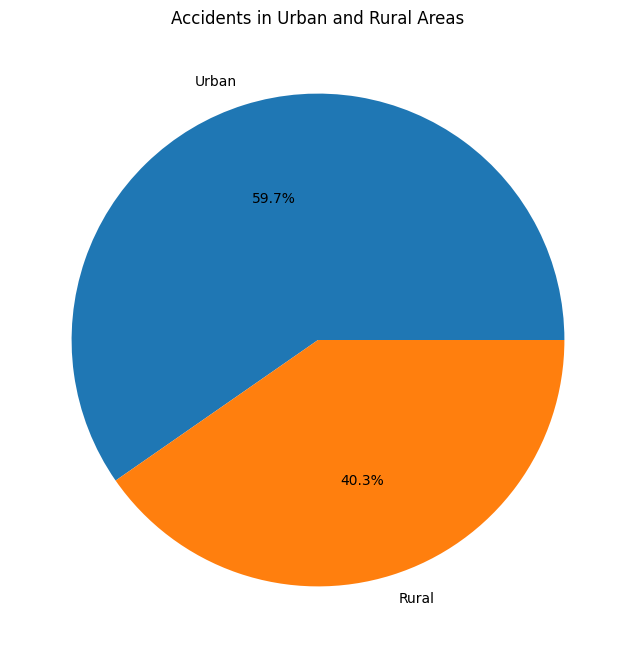

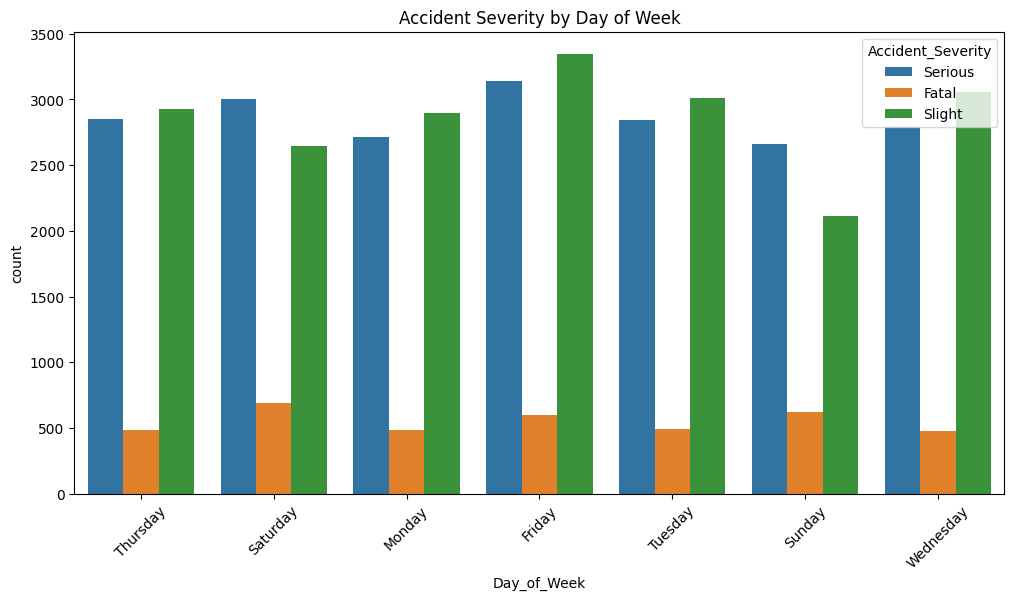

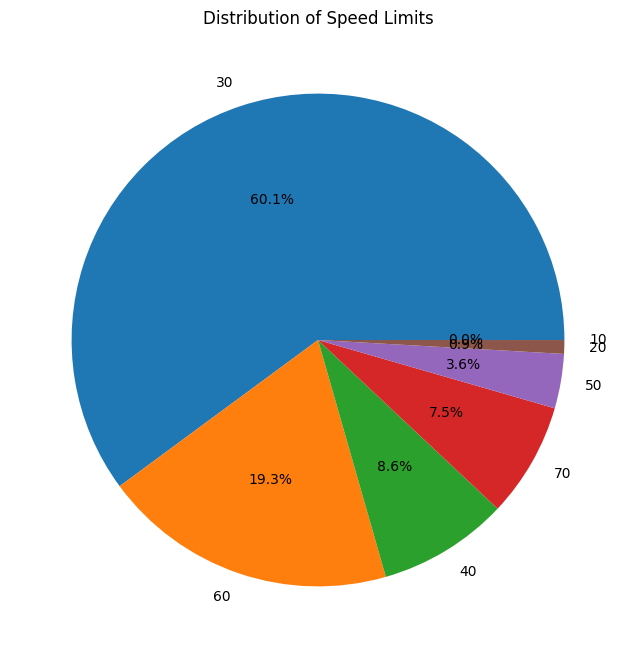

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Bar chart for Light Conditions
plt.figure(figsize=(10, 6))
sns.countplot(x='Light_Conditions', data=data)
plt.title('Accidents by Light Conditions')
plt.xticks(rotation=45)
plt.show()

# Pie chart for Urban_or_Rural_Area
plt.figure(figsize=(8, 8))
data['Urban_or_Rural_Area'].value_counts().plot.pie(autopct='%1.1f%%')
plt.title('Accidents in Urban and Rural Areas')
plt.ylabel('')
plt.show()

# Stacked bar chart for Accident_Severity by Day_of_Week
plt.figure(figsize=(12, 6))
sns.countplot(x='Day_of_Week', hue='Accident_Severity', data=data)
plt.title('Accident Severity by Day of Week')
plt.xticks(rotation=45)
plt.show()

# Heatmap for Weather_Conditions and Accident_Severity
plt.figure(figsize=(10, 6))
weather_accident_pivot = data.pivot_table(index='Weather_Conditions', columns='Accident_Severity', aggfunc='size', fill_value=0)
sns.heatmap(weather_accident_pivot, annot=True, fmt='d', cmap='coolwarm')
plt.title('Weather Conditions vs. Accident Severity')
plt.show()

# Pie chart for Speed Limit
plt.figure(figsize=(8, 8))
data['Speed_limit'].value_counts().plot.pie(autopct='%1.1f%%')
plt.title('Distribution of Speed Limits')
plt.ylabel('')
plt.show()

##Encoding the data

*Changing the data type in 'Time' column from continuous to discrete

In [ ]:
for index, row in data.iterrows():
    data.at[index, 'Time'] = int(row['Time'].split(':')[0])
    if data.at[index, 'Time'] == 0:
      data.at[index, 'Time'] = 24
data['Time'] = data['Time'].astype(int)
print(data['Time'])

0        12
1        12
2         5
3         7
4        18
         ..
43839     9
43840    21
43841    11
43842     9
43843    13
Name: Time, Length: 43844, dtype: int64


*change the name of 'Urban_or_Rural_Area' column to 'Is_Urban'

In [ ]:
data.rename(columns={'Urban_or_Rural_Area': 'Is_Urban'}, inplace=True)

*Encoding 'Urban_or_Rural_Area' column

In [ ]:
#urban=1, rural=0
from sklearn.preprocessing import LabelBinarizer

lb = LabelBinarizer()
data['Is_Urban'] = lb.fit_transform(data['Is_Urban'])
print(data['Is_Urban'])

0        1
1        0
2        0
3        0
4        0
        ..
43839    0
43840    1
43841    0
43842    0
43843    0
Name: Is_Urban, Length: 43844, dtype: int64


*Encoding the target column 'Accident_Severity'

In [ ]:
from sklearn.preprocessing import OrdinalEncoder

# Sample dataset
category = ['Slight','Serious', 'Fatal']

# Initialize OrdinalEncoder
encoder = OrdinalEncoder(categories=[category])

data_reshaped=data['Accident_Severity'].values.reshape(-1,1)

# Fit and transform the data
data['Accident_Severity'] = encoder.fit_transform(data_reshaped)

data['Accident_Severity'] = data['Accident_Severity'].astype(int)
# Display the encoded data
data.head()


Day_of_Week                     Junction_Control  \
0    Thursday             Give way or uncontrolled   
1    Saturday             Give way or uncontrolled   
2    Thursday  Not at junction or within 20 metres   
3      Monday             Give way or uncontrolled   
4    Saturday             Give way or uncontrolled   

                       Junction_Detail  Accident_Severity   Latitude  \
0              T or staggered junction                  1  52.423358   
1              T or staggered junction                  2  51.677601   
2  Not at junction or within 20 metres                  2  51.581629   
3              T or staggered junction                  1  52.019744   
4                      Mini-roundabout                  1  54.946285   

        Light_Conditions  Longitude  Number_of_Casualties  Number_of_Vehicles  \
0               Daylight  -1.495125                     1                   1   
1               Daylight  -1.443584                     2                   2   
2               Daylight   0.378332                     2                   2   
3               Daylight  -0.423578                     1                   2   
4  Darkness - lights lit  -1.466355                     1                   2   

  Road_Surface_Conditions           Road_Type  Speed_limit  Time  Is_Urban  \
0                     Dry  Single carriageway           30    12         1   
1                     Dry    Dual carriageway           70    12         0   
2                     Dry    Dual carriageway           70     5         0   
3                     Dry    Dual carriageway           70     7         0   
4                     Dry          Roundabout           40    18         0   

   Weather_Conditions Vehicle_Type  
0  Fine no high winds          Car  
1  Fine no high winds          Car  
2  Fine no high winds          Car  
3  Fine no high winds          Car  
4  Fine no high winds          Car

*Selecting object columns to encode

In [ ]:
# Select the object (string) columns
import numpy as np

mask = data.dtypes == object
categorical_cols = data.columns[mask]
categorical_cols

Index(['Day_of_Week', 'Junction_Control', 'Junction_Detail',
       'Light_Conditions', 'Road_Surface_Conditions', 'Road_Type',
       'Weather_Conditions', 'Vehicle_Type'],
      dtype='object')

In [ ]:
for col in categorical_cols:
    unique_values = data[col].unique()
    num_unique_values = data[col].nunique()
    print(f"'{col}': {unique_values} = {num_unique_values}")

'Day_of_Week': ['Thursday' 'Saturday' 'Monday' 'Friday' 'Tuesday' 'Sunday' 'Wednesday'] = 7
'Junction_Control': ['Give way or uncontrolled' 'Not at junction or within 20 metres'
 'Data missing or out of range' 'Auto traffic signal' 'Stop sign'
 'Authorised person' 'Auto traffic sigl'] = 7
'Junction_Detail': ['T or staggered junction' 'Not at junction or within 20 metres'
 'Mini-roundabout' 'Crossroads' 'Roundabout' 'Other junction'
 'Private drive or entrance' 'Slip road'
 'More than 4 arms (not roundabout)'] = 9
'Light_Conditions': ['Daylight' 'Darkness - lights lit' 'Darkness - no lighting'
 'Darkness - lighting unknown' 'Darkness - lights unlit'] = 5
'Road_Surface_Conditions': ['Dry' 'Wet or damp' 'Snow' 'Frost or ice' 'Flood over 3cm. deep'] = 5
'Road_Type': ['Single carriageway' 'Dual carriageway' 'Roundabout' 'One way street'
 'Slip road'] = 5
'Weather_Conditions': ['Fine no high winds' 'Raining no high winds' 'Snowing + high winds'
 'Raining + high winds' 'Other' 'Snowing no hig

In [ ]:
# Determine how many extra columns would be created
num_ohc_cols = (data[categorical_cols]
                .apply(lambda x: x.nunique())
                .sort_values(ascending=False))


# No need to encode if there is only one value
small_num_ohc_cols = num_ohc_cols.loc[num_ohc_cols>1]

# Number of one-hot columns is one less than the number of categories
small_num_ohc_cols -= 1

# This is 52 columns, assuming the original ones are dropped.
# This is quite a few extra columns!
small_num_ohc_cols.sum()

52

*choosing 'OneHotEncoder' over 'get_dummies' because 'OneHotEncoder' is more flexible and can handle a wider range of scenarios, such as working with missing values and unknown categories

In [ ]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

# Copy of the data
data_ohc = data.copy()

# The encoders
le = LabelEncoder()
ohc = OneHotEncoder()

for col in num_ohc_cols.index:

    # Integer encode the string categories
    dat = le.fit_transform(data_ohc[col]).astype(int)

    # Remove the original column from the dataframe
    data_ohc = data_ohc.drop(col, axis=1)

    # One hot encode the data--this returns a sparse array
    new_dat = ohc.fit_transform(dat.reshape(-1,1))

    # Create unique column names
    n_cols = new_dat.shape[1]
    col_names = ['_'.join([col, str(x)]) for x in range(n_cols)]

    # Create the new dataframe
    new_df = pd.DataFrame(new_dat.toarray(),
                          index=data_ohc.index,
                          columns=col_names)

    # Append the new data to the dataframe
    data_ohc = pd.concat([data_ohc, new_df], axis=1)


In [ ]:
data_ohc

Accident_Severity   Latitude  Longitude  Number_of_Casualties  \
0                      1  52.423358  -1.495125                     1   
1                      2  51.677601  -1.443584                     2   
2                      2  51.581629   0.378332                     2   
3                      1  52.019744  -0.423578                     1   
4                      1  54.946285  -1.466355                     1   
...                  ...        ...        ...                   ...   
43839                  2  57.221408  -3.815043                     4   
43840                  1  51.477415  -0.051510                     1   
43841                  0  51.016371  -1.636438                     1   
43842                  0  51.102305  -0.089181                     1   
43843                  1  52.503832   0.082570                     1   

       Number_of_Vehicles  Speed_limit  Time  Is_Urban  Vehicle_Type_0  \
0                       1           30    12         1             0.0   
1                       2           70    12         0             0.0   
2                       2           70     5         0             0.0   
3                       2           70     7         0             0.0   
4                       2           40    18         0             0.0   
...                   ...          ...   ...       ...             ...   
43839                   3           60     9         0             0.0   
43840                   2           30    21         1             0.0   
43841                   2           60    11         0             0.0   
43842                   3           60     9         0             0.0   
43843                   2           60    13         0             0.0   

       Vehicle_Type_1  ...  Road_Surface_Conditions_0  \
0                 0.0  ...                        1.0   
1                 0.0  ...                        1.0   
2                 0.0  ...                        1.0   
3                 0.0  ...                        1.0   
4                 0.0  ...                        1.0   
...               ...  ...                        ...   
43839             0.0  ...                        0.0   
43840             0.0  ...                        0.0   
43841             0.0  ...                        1.0   
43842             0.0  ...                        0.0   
43843             0.0  ...                        1.0   

       Road_Surface_Conditions_1  Road_Surface_Conditions_2  \
0                            0.0                        0.0   
1                            0.0                        0.0   
2                            0.0                        0.0   
3                            0.0                        0.0   
4                            0.0                        0.0   
...                          ...                        ...   
43839                        0.0                        0.0   
43840                        0.0                        0.0   
43841                        0.0                        0.0   
43842                        0.0                        0.0   
43843                        0.0                        0.0   

       Road_Surface_Conditions_3  Road_Surface_Conditions_4  Road_Type_0  \
0                            0.0                        0.0          0.0   
1                            0.0                        0.0          1.0   
2                            0.0                        0.0          1.0   
3                            0.0                        0.0          1.0   
4                            0.0                        0.0          0.0   
...                          ...                        ...          ...   
43839                        0.0                        1.0          0.0   
43840                        0.0                        1.0          0.0   
43841                        0.0                        0.0          0.0   
43842                        0.0                   

In [ ]:
# Column difference is as calculated above
data_ohc.shape[1] - data.shape[1]

52

##checking correlation between dependent variables

In [ ]:
# Calculate the correlation values
feature_cols = data_ohc.columns[:-1]
corr_values = data_ohc[feature_cols].corr()

# Simplify by emptying all the data below the diagonal
tril_index = np.tril_indices_from(corr_values)

# Make the unused values NaNs
for coord in zip(*tril_index):
    corr_values.iloc[coord[0], coord[1]] = np.NaN

# Stack the data and convert to a data frame
corr_values = (corr_values.stack().to_frame().reset_index().rename(columns={'level_0':'feature1','level_1':'feature2',0:'correlation'}))

# Get the absolute values for sorting
corr_values['abs_correlation'] = corr_values.correlation.abs()

*The histogram shows that the colums have low correlation. Most of them have zero correlation.

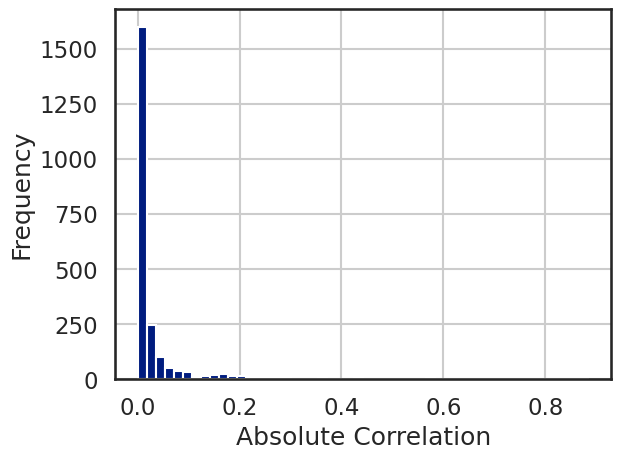

In [ ]:
#A histogram of the absolute value correlations.
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.set_context('talk')
sns.set_style('white')
sns.set_palette('dark')

ax = corr_values.abs_correlation.hist(bins=50)

ax.set(xlabel='Absolute Correlation', ylabel='Frequency');

##Checking Skew of the data

In [ ]:
data= data_ohc
y_col = 'Accident_Severity'
feature_cols = [x for x in data.columns if x != y_col]
x_data = data[feature_cols]
y_data = data[y_col]

In [ ]:
# Create a list of float and int columns (excluding the target) to check for skewing
mask = ((data.dtypes == float) | (data.dtypes == int)) & (data.columns != 'Accident_Severity')
numeric_cols = data.columns[mask]
skew_limit = 0.75
skew_vals = x_data[numeric_cols].skew()

skew_cols = (skew_vals
             .sort_values(ascending=False)
             .to_frame()
             .rename(columns={0:'Skew'})
             .query('abs(Skew) > {0}'.format(skew_limit)))


skew_cols

Skew
Junction_Control_1         66.194411
Vehicle_Type_11            55.936828
Junction_Control_0         27.681162
Road_Surface_Conditions_1  25.914678
Weather_Conditions_6       24.616814
...                              ...
Road_Surface_Conditions_0  -0.813683
Light_Conditions_4         -0.962858
Road_Type_3                -1.287064
Vehicle_Type_2             -1.356025
Weather_Conditions_1       -1.688813

[61 rows x 1 columns]

*Reducing skewness by applying transformations that make the distribution more symmetric- log transformation

In [ ]:
# Mute the setting wtih a copy warnings
pd.options.mode.chained_assignment = None

for col in skew_cols.index.tolist():
    x_data[col] = np.log1p(x_data[col])

*Checking if the transformation is working, in this case the log transoformation isn't working

In [ ]:
# Check the skewness again
skew_vals_after = x_data[numeric_cols].skew()
skew_cols_after = (skew_vals_after
                   .sort_values(ascending=False)
                   .to_frame()
                   .rename(columns={0: 'Skew'})
                   .query('abs(Skew) > {0}'.format(skew_limit)))

skew_cols_after

Skew
Junction_Control_1         66.194411
Vehicle_Type_11            55.936828
Junction_Control_0         27.681162
Road_Surface_Conditions_1  25.914678
Weather_Conditions_6       24.616814
Vehicle_Type_0             21.762347
Vehicle_Type_5             19.449439
Light_Conditions_2         16.839982
Junction_Control_6         14.242863
Weather_Conditions_2       13.265473
Light_Conditions_0         11.361193
Road_Type_4                11.058254
Vehicle_Type_10            11.042106
Vehicle_Type_4             10.838218
Junction_Detail_1          10.630421
Weather_Conditions_0        9.513202
Vehicle_Type_8              9.492317
Weather_Conditions_4        9.109669
Vehicle_Type_7              9.054640
Road_Surface_Conditions_3   8.921123
Weather_Conditions_7        8.768096
Junction_Detail_2           8.726901
Junction_Detail_7           8.598693
Vehicle_Type_12             7.300969
Road_Type_1                 7.015564
Vehicle_Type_3              6.668942
Vehicle_Type_6              6.556162
Junction_Detail_4           6.186517
Weather_Conditions_3        5.980000
Vehicle_Type_1              5.791088
Junction_Detail_5           5.068937
Road_Surface_Conditions_2   4.964760
Vehicle_Type_9              4.913005
Vehicle_Type_13             4.098191
Road_Type_2                 3.962186
Junction_Detail_6           3.400591
Light_Conditions_3          3.351671
Junction_Detail_0           2.842225
Junction_Control_5          2.796075
Junction_Control_2          2.764465
Weather_Conditions_5        2.500757
Day_of_Week_3               2.297027
Day_of_Week_1               2.086635
Number_of_Casualties        2.043299
Day_of_Week_4               2.041159
Day_of_Week_6               2.026865
Day_of_Week_2               2.021085
Day_of_Week_5               2.018728
Road_Type_0                 1.975473
Day_of_Week_0               1.838134
Light_Conditions_1          1.489012
Road_Surface_Conditions_4   1.083897
Latitude                    0.948661
Junction_Detail_8           0.854765
Road_Surface_Conditions_0  -0.813683
Light_Conditions_4         -0.962858
Road_Type_3                -1.287064
Vehicle_Type_2             -1.356025
Weather_Conditions_1       -1.688813

*Winsorization is a technique used in statistics to deal with outliers in a dataset.It involves setting the extreme values of a dataset to be equal to some specified percentile of the data.

In [ ]:
# Winsorization (replace values above 95th percentile with 95th percentile value)
for col in skew_cols.index.tolist():
    percentile_95 = np.percentile(x_data[col], 95)
    x_data[col] = np.where(x_data[col] > percentile_95, percentile_95, x_data[col])

*Checking if Winsorization technique is working

In [ ]:
# Check the skewness again
skew_vals_after = x_data[numeric_cols].skew()
skew_cols_after = (skew_vals_after
                   .sort_values(ascending=False)
                   .to_frame()
                   .rename(columns={0: 'Skew'})
                   .query('abs(Skew) > {0}'.format(skew_limit)))

skew_cols_after

Skew
Vehicle_Type_13            4.098191
Road_Type_2                3.962186
Junction_Detail_6          3.400591
Light_Conditions_3         3.351671
Junction_Detail_0          2.842225
Junction_Control_5         2.796075
Junction_Control_2         2.764465
Weather_Conditions_5       2.500757
Day_of_Week_3              2.297027
Day_of_Week_1              2.086635
Day_of_Week_4              2.041159
Day_of_Week_6              2.026865
Day_of_Week_2              2.021085
Day_of_Week_5              2.018728
Road_Type_0                1.975473
Day_of_Week_0              1.838134
Light_Conditions_1         1.489012
Number_of_Casualties       1.402465
Road_Surface_Conditions_4  1.083897
Junction_Detail_8          0.854765
Road_Surface_Conditions_0 -0.813683
Light_Conditions_4        -0.962858
Road_Type_3               -1.287064
Vehicle_Type_2            -1.356025
Weather_Conditions_1      -1.688813

In [ ]:
# Winsorization (replace values above 95th percentile with 95th percentile value)
for col in skew_cols.index.tolist():
    percentile_95 = np.percentile(x_data[col], 95)
    x_data[col] = np.where(x_data[col] > percentile_95, percentile_95, x_data[col])

In [ ]:
# Check the skewness again
skew_vals_after = x_data[numeric_cols].skew()
skew_cols_after = (skew_vals_after
                   .sort_values(ascending=False)
                   .to_frame()
                   .rename(columns={0: 'Skew'})
                   .query('abs(Skew) > {0}'.format(skew_limit)))

skew_cols_after

Skew
Vehicle_Type_13            4.098191
Road_Type_2                3.962186
Junction_Detail_6          3.400591
Light_Conditions_3         3.351671
Junction_Detail_0          2.842225
Junction_Control_5         2.796075
Junction_Control_2         2.764465
Weather_Conditions_5       2.500757
Day_of_Week_3              2.297027
Day_of_Week_1              2.086635
Day_of_Week_4              2.041159
Day_of_Week_6              2.026865
Day_of_Week_2              2.021085
Day_of_Week_5              2.018728
Road_Type_0                1.975473
Day_of_Week_0              1.838134
Light_Conditions_1         1.489012
Number_of_Casualties       1.402465
Road_Surface_Conditions_4  1.083897
Junction_Detail_8          0.854765
Road_Surface_Conditions_0 -0.813683
Light_Conditions_4        -0.962858
Road_Type_3               -1.287064
Vehicle_Type_2            -1.356025
Weather_Conditions_1      -1.688813

In [ ]:
from sklearn.preprocessing import RobustScaler

# Create RobustScaler object
scaler = RobustScaler()

# Apply RobustScaler to the skewed column
x_data[skew_cols.index.tolist()] = scaler.fit_transform(x_data[skew_cols.index.tolist()])

##Scaling the data

Using 'MinMaxScaler' when you need to bound the data to a specific range, especially if your data does not follow a normal distribution or if you are using algorithms that require the data to be on a similar scale, such as KNN.

In [ ]:
# Mute the sklearn warning
import warnings
warnings.filterwarnings('ignore', module='sklearn')

from sklearn.preprocessing import MinMaxScaler

msc = MinMaxScaler()
x_data = pd.DataFrame(msc.fit_transform(x_data),  # this is an np.array, not a dataframe.
                    columns=x_data.columns)
x_data

Latitude  Longitude  Number_of_Casualties  Number_of_Vehicles  \
0      0.493210   0.642604              0.000000            0.000000   
1      0.342479   0.648270              0.021277            0.055556   
2      0.322927   0.848560              0.021277            0.055556   
3      0.411896   0.760403              0.000000            0.055556   
4      0.987980   0.645766              0.000000            0.055556   
...         ...        ...                   ...                 ...   
43839  1.000000   0.387566              0.063830            0.111111   
43840  0.301655   0.801306              0.000000            0.055556   
43841  0.207037   0.627069              0.000000            0.055556   
43842  0.224736   0.797165              0.000000            0.111111   
43843  0.509350   0.816046              0.000000            0.055556   

       Speed_limit      Time  Is_Urban  Vehicle_Type_0  Vehicle_Type_1  \
0         0.333333  0.478261       1.0             0.0             0.0   
1         1.000000  0.478261       0.0             0.0             0.0   
2         1.000000  0.173913       0.0             0.0             0.0   
3         1.000000  0.260870       0.0             0.0             0.0   
4         0.500000  0.739130       0.0             0.0             0.0   
...            ...       ...       ...             ...             ...   
43839     0.833333  0.347826       0.0             0.0             0.0   
43840     0.333333  0.869565       1.0             0.0             0.0   
43841     0.833333  0.434783       0.0             0.0             0.0   
43842     0.833333  0.347826       0.0             0.0             0.0   
43843     0.833333  0.521739       0.0             0.0             0.0   

       Vehicle_Type_2  ...  Road_Surface_Conditions_0  \
0                 1.0  ...                        1.0   
1                 1.0  ...                        1.0   
2                 1.0  ...                        1.0   
3                 1.0  ...                        1.0   
4                 1.0  ...                        1.0   
...               ...  ...                        ...   
43839             1.0  ...                        0.0   
43840             1.0  ...                        0.0   
43841             1.0  ...                        1.0   
43842             0.0  ...                        0.0   
43843             1.0  ...                        1.0   

       Road_Surface_Conditions_1  Road_Surface_Conditions_2  \
0                            0.0                        0.0   
1                            0.0                        0.0   
2                            0.0                        0.0   
3                            0.0                        0.0   
4                            0.0                        0.0   
...                          ...                        ...   
43839                        0.0                        0.0   
43840                        0.0                        0.0   
43841                        0.0                        0.0   
43842                        0.0                        0.0   
43843                        0.0                        0.0   

       Road_Surface_Conditions_3  Road_Surface_Conditions_4  Road_Type_0  \
0                            0.0                        0.0          0.0   
1                            0.0                        0.0          1.0   
2                            0.0                        0.0          1.0   
3                            0.0                        0.0          1.0   
4                            0.0                        0.0          0.0   
...                          ...                        ...          ...   
43839                        0.0                        1.0          0.0   
43840                        0.0                        1.0          0.0   
43841                        0.0                        0.0          0.0   
43842                        0.0                   

##Split the data into train and test

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data,stratify=y_data, test_size=0.3)

In [ ]:
x_train.shape,y_train.shape,x_test.shape,y_test.shape

((30690, 67), (30690,), (13154, 67), (13154,))

##KNN

In [ ]:
# Function to calculate the % of values that were correctly predicted

def accuracy(real, predict):
    return sum(real == predict) / float(real.shape[0])

*Trying KNN with 5 different values of n_neighbors, the results are not so good.

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

results_dict={}
for k in range(1,6):
    knn = KNeighborsClassifier(n_neighbors=k)

    knn.fit(x_train, y_train)

    y_pred = knn.predict(x_test)

    # Calculate accuracy
    acc = accuracy(y_test, y_pred)

    # Store results in the dictionary
    results_dict[k] = acc

for k, result in results_dict.items():
    print(f'k={k}, Accuracy={result}')

k=1, Accuracy=0.44754447316405654
k=2, Accuracy=0.4755207541432264
k=3, Accuracy=0.46677816633723584
k=4, Accuracy=0.4700471339516497
k=5, Accuracy=0.48145050935076783


##PCA

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def measure_error(y_true, y_pred, label):
    return pd.Series({'accuracy':accuracy_score(y_true, y_pred),
                      'precision': precision_score(y_true, y_pred, average='macro'),
                      'recall': recall_score(y_true, y_pred, average='macro'),
                      'f1': f1_score(y_true, y_pred, average='macro')},
                      name=label)

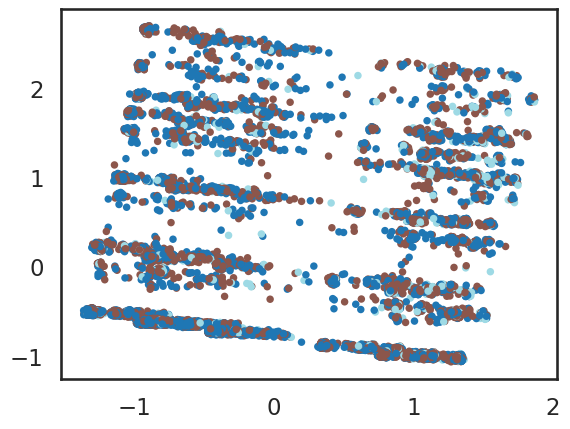

In [ ]:
from sklearn import decomposition
pca = decomposition.PCA(n_components=5, whiten=True)
pca.fit(x_train)
test_2d = pca.fit_transform(x_test)
plt.scatter(test_2d[:,0],test_2d[:,1],s=15,c=y_test, cmap=plt.cm.tab20)

In [ ]:
X_train_pca = pca.transform(x_train)
X_test_pca = pca.transform(x_test)

*Trying logistic regression with PCA

In [ ]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=0).fit(X_train_pca, y_train)
y_train_pred = clf.predict(X_train_pca)
y_test_pred = clf.predict(X_test_pca)
train_test_error = pd.concat([measure_error(y_train, y_train_pred, 'train'),
                                 measure_error(y_test, y_test_pred, 'test')],
                                axis=1)
train_test_error

train      test
accuracy   0.509808  0.513456
precision  0.340464  0.342836
recall     0.372537  0.375191
f1         0.355576  0.358110

##LR- Logistic Regression

'saga': This is an extension of the SAG solver that also supports L1 regularization. It is recommended for large datasets and problems with a large number of features. It can handle both L1 and L2 penalties and is suitable for multi-class classification.

In [ ]:
from sklearn.linear_model import LogisticRegressionCV

# L1 regularized logistic regression
lr_l1 = LogisticRegressionCV(Cs=10, cv=4, penalty='l1', solver='saga').fit(x_train, y_train)
y_test_pred_l1 = lr_l1.predict(x_test)
print("l1:", accuracy(y_test, y_test_pred_l1))

l1: 0.540824083928843


In [ ]:
print(lr_l1.Cs_)
best_C = lr_l1.C_[0]
print("Best C value:", best_C)

[1.00000000e-04 7.74263683e-04 5.99484250e-03 4.64158883e-02
 3.59381366e-01 2.78255940e+00 2.15443469e+01 1.66810054e+02
 1.29154967e+03 1.00000000e+04]
Best C value: 166.81005372000558


In [ ]:
# L2 regularized logistic regression
lr_l2 = LogisticRegressionCV(Cs=10, cv=4, penalty='l2', solver='lbfgs').fit(x_train, y_train)
y_test_pred_l2 = lr_l2.predict(x_test)
print("l2:", accuracy(y_test, y_test_pred_l2))

l2: 0.540824083928843


In [ ]:
print(lr_l2.Cs_)
best_C = lr_l2.C_[0]
print("Best C value:", best_C)

[1.00000000e-04 7.74263683e-04 5.99484250e-03 4.64158883e-02
 3.59381366e-01 2.78255940e+00 2.15443469e+01 1.66810054e+02
 1.29154967e+03 1.00000000e+04]
Best C value: 1291.5496650148827


In [ ]:
# Standard logistic regression- none regularization
lr_no_reg = LogisticRegression(C=100000).fit(x_train, y_train)
y_test_pred_lr_no_reg = lr_no_reg.predict(x_test)
print("lr_no_reg:", accuracy(y_test, y_test_pred_lr_no_reg))

lr_no_reg: 0.5409761289341645


*The maximum coefficient of each LR model

In [ ]:
coeff_labels = ['l1', 'l2','lr_no_reg']
coeff_models = [lr_l1, lr_l2, lr_no_reg]
for lab,mod in zip(coeff_labels, coeff_models):
  print(lab, ":", np.max(np.abs(mod.coef_)))

l1 : 10.265023046109683
l2 : 9.422639385324896
lr_no_reg : 6.978404703532519


*The sum of the coefficients for each LR model

In [ ]:
coeff_labels = ['l1', 'l2','lr_no_reg']
coeff_models = [lr_l1, lr_l2, lr_no_reg]
for lab,mod in zip(coeff_labels, coeff_models):
  print(lab, ":", np.sum(np.abs(mod.coef_)))

l1 : 40.459217703988536
l2 : 45.14136353694528
lr_no_reg : 47.37292278140147


*Coefficients matrix for each LR model

In [ ]:
coefficients = list()

coeff_labels = ['l1', 'l2','lr_no_reg']
coeff_models = [lr_l1, lr_l2, lr_no_reg]

for lab,mod in zip(coeff_labels, coeff_models):
    coeffs = mod.coef_
    coeff_label = pd.MultiIndex(levels=[[lab], [0,1,2]], codes=[[0,0,0], [0,1,2]])
    coefficients.append(pd.DataFrame(coeffs.T, columns=coeff_label))

coefficients = pd.concat(coefficients, axis=1)

coefficients.sample(10)

l1                            l2                     lr_no_reg  \
            0         1         2         0         1         2         0   
43  -0.003527  0.024892 -0.000010  0.065383  0.062860 -0.128244  0.297969   
6    0.197330  0.000022 -0.183206  0.192367 -0.004808 -0.187559  0.209317   
60   0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
46   0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
32   0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
2  -10.265023  0.000021  7.950268 -9.422639  0.804965  8.617675 -6.978405   
66   0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
63   0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
36   0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
24  -0.208806 -0.010199  0.552306 -0.329737 -0.133758  0.463495 -0.356940   

                        
           1         2  
43  0.151975 -0.449944  
6  -0.024728 -0.184589  
60  0.000000  0.000000  
46  0.000000  0.000000  
32  0.000000  0.000000  
2   2.077942  4.900462  
66  0.000000  0.000000  
63  0.000000  0.000000  
36  0.000000  0.000000  
24 -0.251918  0.608858

*According to the plot it seems that the three types of logistic regression models predict about the same thing.

In [ ]:
fig, axList = plt.subplots(nrows=1, ncols=3)
axList = axList.flatten()
fig.set_size_inches(12,3)


for ax in enumerate(axList):
    loc = ax[0]
    ax = ax[1]

    data_ = coefficients.xs(loc, level=1, axis=1)
    data_.plot(marker='o', ls='', ms=1.0, ax=ax, legend=False)

    if ax is axList[0]:
        ax.legend(loc=4)

    ax.set(title='Coefficient Set '+str(loc))

plt.tight_layout()

*Predict the class and the probability for each sample in the test

In [ ]:
# Predict the class and the probability for each

y_pred = list()
y_prob = list()

coeff_labels = ['l1', 'l2','lr_no_reg']
coeff_models = [lr_l1, lr_l2, lr_no_reg]

for lab,mod in zip(coeff_labels, coeff_models):
    y_pred.append(pd.Series(mod.predict(x_test), name=lab))
    y_prob.append(pd.Series(mod.predict_proba(x_test).max(axis=1), name=lab))

y_pred = pd.concat(y_pred, axis=1)
y_prob = pd.concat(y_prob, axis=1)

y_pred.head()

l1  l2  lr_no_reg
0   0   0          0
1   0   0          0
2   0   0          0
3   1   1          1
4   0   0          0

In [ ]:
y_prob.head()

l1        l2  lr_no_reg
0  0.609908  0.610200   0.634745
1  0.593954  0.593939   0.589815
2  0.557281  0.557592   0.552596
3  0.459839  0.459735   0.450452
4  0.540982  0.540866   0.538258

*These results suggest that lr_no_reg generally performs better than l1 and l2 in terms of accuracy, AUC, precision, recall, and F1-score. However, the differences between the models are relatively small

In [ ]:
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score
from sklearn.preprocessing import label_binarize

metrics = list()
cm = dict()

for lab in coeff_labels:

    # Preciision, recall, f-score from the multi-class support function
    precision, recall, fscore, _ = score(y_test, y_pred[lab], average='weighted')

    # The usual way to calculate accuracy
    accuracy = accuracy_score(y_test, y_pred[lab])

    # ROC-AUC scores can be calculated by binarizing the data
    auc = roc_auc_score(label_binarize(y_test, classes=[0,1,2]),
              label_binarize(y_pred[lab], classes=[0,1,2]),
              average='weighted')

    # Last, the confusion matrix
    cm[lab] = confusion_matrix(y_test, y_pred[lab])

    metrics.append(pd.Series({'precision':precision, 'recall':recall,
                              'fscore':fscore, 'accuracy':accuracy,
                              'auc':auc},
                             name=lab))

metrics = pd.concat(metrics, axis=1)

metrics

l1        l2  lr_no_reg
precision  0.524162  0.524125   0.525254
recall     0.540824  0.540824   0.540976
fscore     0.518263  0.518264   0.517559
accuracy   0.540824  0.540824   0.540976
auc        0.578673  0.578673   0.578446

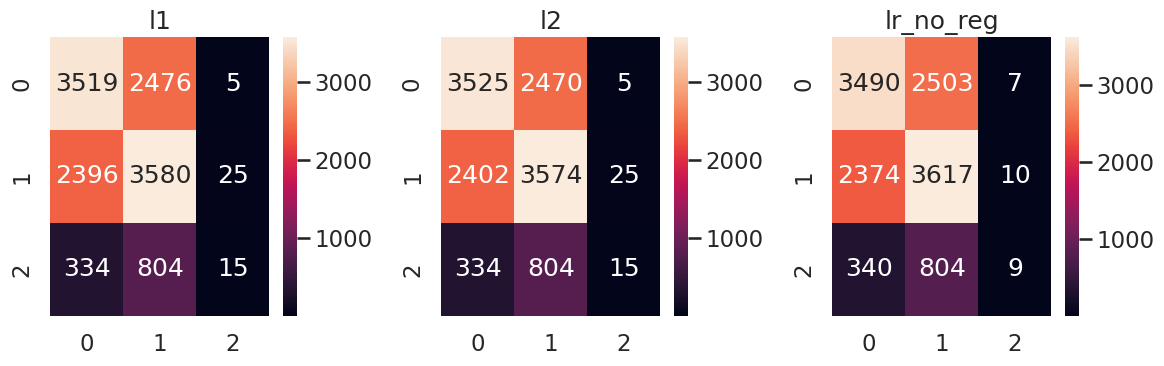

In [ ]:
fig, axList = plt.subplots(nrows=1, ncols=3)
axList = axList.flatten()
fig.set_size_inches(12, 4)

#axList[-1].axis('off')

for ax,lab in zip(axList, coeff_labels):
    sns.heatmap(cm[lab], ax=ax, annot=True, fmt='d');
    ax.set(title=lab);

plt.tight_layout()

##Naive bayes

In [ ]:
print(data.dtypes)

Accident_Severity         int64
Latitude                float64
Longitude               float64
Number_of_Casualties      int64
Number_of_Vehicles        int64
                         ...   
Road_Type_0             float64
Road_Type_1             float64
Road_Type_2             float64
Road_Type_3             float64
Road_Type_4             float64
Length: 68, dtype: object


MultinomialNB model knows to convert continuous data into discrete data.
BernoulliNB model doesn't do it in a good way.



In [ ]:
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB
from sklearn.model_selection import cross_val_score

nb = {'gaussian': GaussianNB(),
      'bernoulli': BernoulliNB(),
      'multinomial': MultinomialNB()}
scores = {}
cv_N = 4
for key, model in nb.items():
    s = cross_val_score(model, x_data, y_data, cv=cv_N, n_jobs=cv_N, scoring='accuracy')
    scores[key] = np.mean(s)
scores

{'gaussian': 0.45381352066417296,
 'bernoulli': 0.50107198248335,
 'multinomial': 0.5005473953106468}

In [ ]:
#Fit a GaussianNB to the training split.
model = GaussianNB()
model.fit(x_train, y_train)

#Get predictions on the test set.
predictions = model.predict(x_test)

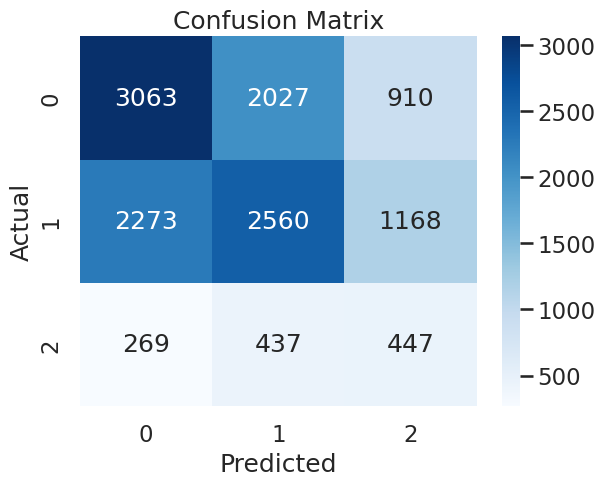

In [ ]:
#use sns.heatmap to plot the confusion matrix for predictions.
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_test, predictions)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap="Blues", xticklabels=model.classes_, yticklabels=model.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
#Fit a MultinomialNB to the training split.
model = MultinomialNB()
model.fit(x_train, y_train)

#Get predictions on the test set.
predictions = model.predict(x_test)

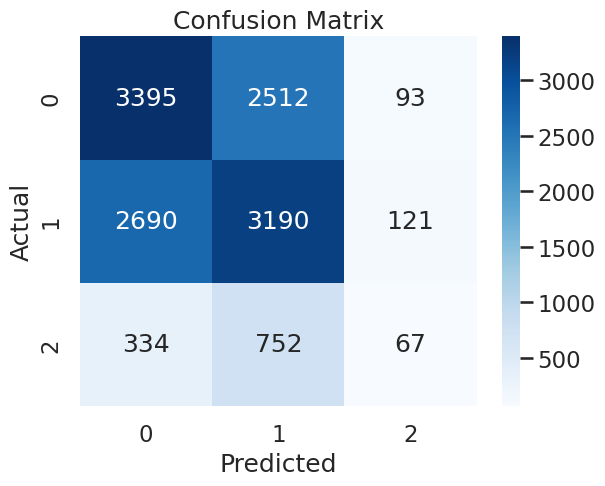

In [ ]:
#use sns.heatmap to plot the confusion matrix for predictions.
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_test, predictions)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap="Blues", xticklabels=model.classes_, yticklabels=model.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
# Create X_discrete from X using .rank(pct=True)
X_discrete = x_data.rank(pct=True)
X_discrete

Latitude  Longitude  Number_of_Casualties  Number_of_Vehicles  \
0      0.529491   0.448043              0.368842            0.185476   
1      0.394581   0.468548              0.821196            0.636119   
2      0.349261   0.928656              0.821196            0.636119   
3      0.463940   0.679454              0.368842            0.636119   
4      0.939901   0.461067              0.368842            0.636119   
...         ...        ...                   ...                 ...   
43839  0.975002   0.053097              0.971672            0.938988   
43840  0.236794   0.848873              0.368842            0.636119   
43841  0.090411   0.403134              0.368842            0.636119   
43842  0.101724   0.828483              0.368842            0.938988   
43843  0.556405   0.886461              0.368842            0.636119   

       Speed_limit      Time  Is_Urban  Vehicle_Type_0  Vehicle_Type_1  \
0         0.309563  0.346558  0.701704        0.500011        0.500011   
1         0.962367  0.346558  0.201704        0.500011        0.500011   
2         0.962367  0.049106  0.201704        0.500011        0.500011   
3         0.962367  0.094049  0.201704        0.500011        0.500011   
4         0.652906  0.770174  0.201704        0.500011        0.500011   
...            ...       ...       ...             ...             ...   
43839     0.828061  0.201293  0.201704        0.500011        0.500011   
43840     0.309563  0.909965  0.701704        0.500011        0.500011   
43841     0.828061  0.292320  0.201704        0.500011        0.500011   
43842     0.828061  0.201293  0.201704        0.500011        0.500011   
43843     0.828061  0.405666  0.201704        0.500011        0.500011   

       Vehicle_Type_2  ...  Road_Surface_Conditions_0  \
0            0.609719  ...                   0.655802   
1            0.609719  ...                   0.655802   
2            0.609719  ...                   0.655802   
3            0.609719  ...                   0.655802   
4            0.609719  ...                   0.655802   
...               ...  ...                        ...   
43839        0.609719  ...                   0.155802   
43840        0.609719  ...                   0.155802   
43841        0.609719  ...                   0.655802   
43842        0.109719  ...                   0.155802   
43843        0.609719  ...                   0.655802   

       Road_Surface_Conditions_1  Road_Surface_Conditions_2  \
0                       0.500011                   0.500011   
1                       0.500011                   0.500011   
2                       0.500011                   0.500011   
3                       0.500011                   0.500011   
4                       0.500011                   0.500011   
...                          ...                        ...   
43839                   0.500011                   0.500011   
43840                   0.500011                   0.500011   
43841                   0.500011                   0.500011   
43842                   0.500011                   0.500011   
43843                   0.500011                   0.500011   

       Road_Surface_Conditions_3  Road_Surface_Conditions_4  Road_Type_0  \
0                       0.500011                   0.369127     0.425691   
1                       0.500011                   0.369127     0.925691   
2                       0.500011                   0.369127     0.925691   
3                       0.500011                   0.369127     0.925691   
4                       0.500011                   0.369127     0.425691   
...                          ...                        ...          ...   
43839                   0.500011                   0.869127     0.425691   
43840                   0.500011                   0.869127     0.425691   
43841                   0.500011                   0.369127     0.425691   
43842                   0.500011                   

In [ ]:
# Modify X_discrete so that it is indeed discrete
X_discrete = X_discrete.applymap(lambda x: int(round(x * 100)))  # Convert percentile ranks to integers (rounded) and extract first 2 digits
X_discrete

Latitude  Longitude  Number_of_Casualties  Number_of_Vehicles  \
0            53         45                    37                  19   
1            39         47                    82                  64   
2            35         93                    82                  64   
3            46         68                    37                  64   
4            94         46                    37                  64   
...         ...        ...                   ...                 ...   
43839        98          5                    97                  94   
43840        24         85                    37                  64   
43841         9         40                    37                  64   
43842        10         83                    37                  94   
43843        56         89                    37                  64   

       Speed_limit  Time  Is_Urban  Vehicle_Type_0  Vehicle_Type_1  \
0               31    35        70              50              50   
1               96    35        20              50              50   
2               96     5        20              50              50   
3               96     9        20              50              50   
4               65    77        20              50              50   
...            ...   ...       ...             ...             ...   
43839           83    20        20              50              50   
43840           31    91        70              50              50   
43841           83    29        20              50              50   
43842           83    20        20              50              50   
43843           83    41        20              50              50   

       Vehicle_Type_2  ...  Road_Surface_Conditions_0  \
0                  61  ...                         66   
1                  61  ...                         66   
2                  61  ...                         66   
3                  61  ...                         66   
4                  61  ...                         66   
...               ...  ...                        ...   
43839              61  ...                         16   
43840              61  ...                         16   
43841              61  ...                         66   
43842              11  ...                         16   
43843              61  ...                         66   

       Road_Surface_Conditions_1  Road_Surface_Conditions_2  \
0                             50                         50   
1                             50                         50   
2                             50                         50   
3                             50                         50   
4                             50                         50   
...                          ...                        ...   
43839                         50                         50   
43840                         50                         50   
43841                         50                         50   
43842                         50                         50   
43843                         50                         50   

       Road_Surface_Conditions_3  Road_Surface_Conditions_4  Road_Type_0  \
0                             50                         37           43   
1                             50                         37           93   
2                             50                         37           93   
3                             50                         37           93   
4                             50                         37           43   
...                          ...                        ...          ...   
43839                         50                         87           43   
43840                         50                         87           43   
43841                         50                         37           43   
43842                         50                         87           43   
43843                  

In [ ]:
# Split X_discrete and y into training and test datasets
X_train_discrete, X_test_discrete, y_train_discrete, y_test_discrete = train_test_split(X_discrete, y_data, test_size=0.3, random_state=42)
# Fit a MultinomialNB to the training split
model_discrete = MultinomialNB()
model_discrete.fit(X_train_discrete, y_train_discrete)

# Get predictions on the test set
predictions_discrete = model_discrete.predict(X_test_discrete)

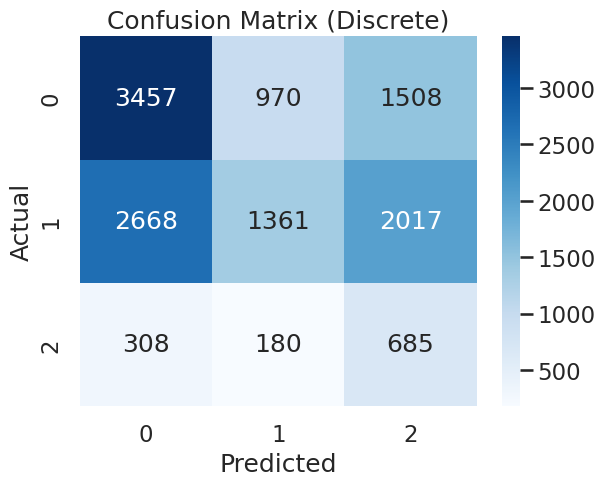

In [ ]:
# Plot the confusion matrix for predictions
conf_matrix_discrete = confusion_matrix(y_test_discrete, predictions_discrete)
sns.heatmap(conf_matrix_discrete, annot=True, fmt='d', cmap="Blues", xticklabels=model_discrete.classes_, yticklabels=model_discrete.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (Discrete)')
plt.show()

##SVM

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

param_grid = {
    'C': [0.1, 1, 100],
    'degree': [3],
    'kernel': ['poly']
}
# Create the grid search object
grid_search = GridSearchCV(SVC(), param_grid, cv=4, scoring='accuracy', verbose=3, n_jobs=-1)

# Fit the grid search to the data
grid_search.fit(x_train, y_train)

# Print the best parameters
print("Best parameters:", grid_search.best_params_)

# Predict using the best model
y_pred = grid_search.predict(x_test)

# Print the classification report
print(classification_report(y_test, y_pred))

Fitting 4 folds for each of 3 candidates, totalling 12 fits
Best parameters: {'C': 100, 'degree': 3, 'kernel': 'poly'}
              precision    recall  f1-score   support

           0       0.56      0.57      0.56      6000
           1       0.52      0.59      0.55      6001
           2       0.19      0.02      0.03      1153

    accuracy                           0.53     13154
   macro avg       0.42      0.39      0.38     13154
weighted avg       0.51      0.53      0.51     13154



In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
# Define parameters for cross-validation
param_grid = {'C': [0.1, 1, 10, 100],
              'gamma': [0.01, 0.1, 10]}

# Create SVM model
svm = SVC(kernel='rbf')

# Perform grid search with cross-validation
grid_search = GridSearchCV(svm, param_grid, cv=4, scoring='accuracy')
grid_search.fit(x_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Score:", best_score)

Best Parameters: {'C': 100, 'gamma': 0.01}
Best Score: 0.5336918073776022


##Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=42)
dt = dt.fit(x_train, y_train)
print("node count: " ,dt.tree_.node_count,"max depth: ", dt.tree_.max_depth)

node count:  21037 max depth:  46


In [ ]:
# The error on the training and test data sets
y_train_pred = dt.predict(x_train)
y_test_pred = dt.predict(x_test)

train_test_full_error = pd.concat([measure_error(y_train, y_train_pred,'train'),
                              measure_error(y_test, y_test_pred, 'test')],
                              axis=1)

train_test_full_error

train      test
accuracy     1.0  0.460620
precision    1.0  0.383585
recall       1.0  0.386797
f1           1.0  0.384893

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.0778622 to fit



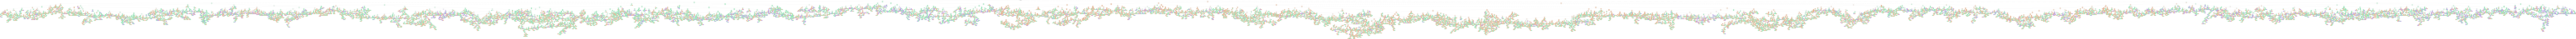

In [ ]:
from io import StringIO
from IPython.display import Image, display

from sklearn.tree import export_graphviz

try:
    import pydotplus
    pydotplus_installed = True

except:
    print('PyDotPlus must be installed to execute the remainder of the cells associated with this question.')
    print('Please see the instructions for this question for details.')
    pydotplus_installed = False
if pydotplus_installed:

    # Create an output destination for the file
    dot_data = StringIO()

    export_graphviz(dt, out_file=dot_data, filled=True)
    graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
    print(graph)
    # View the tree image
    filename = 'Car_Accidents_tree.png'
    graph.write_png(filename)
    img = Image(filename=filename)
    display(img)

else:
    print('This cell not executed because PyDotPlus could not be loaded.')

In [ ]:
feature_imp = pd.Series(dt.feature_importances_, index=x_train.columns).sort_values(ascending=False)
feature_imp.nlargest(20).plot(kind='barh')

<Axes: >

In [ ]:
from sklearn.model_selection import GridSearchCV
param_grid = {'max_depth':range(1, dt.tree_.max_depth+1, 2),
              'max_features': range(1, len(dt.feature_importances_)+1)}

GR = GridSearchCV(DecisionTreeClassifier(random_state=42),
                  param_grid=param_grid,
                  scoring='accuracy',
                  n_jobs=-1)

GR = GR.fit(x_train, y_train)
print("node count: " ,GR.best_estimator_.tree_.node_count,"max depth: ",  GR.best_estimator_.tree_.max_depth)

node count:  63 max depth:  5


In [ ]:
y_train_pred = GR.predict(x_train)
y_test_pred = GR.predict(x_test)

train_test_error = pd.concat([measure_error(y_train, y_train_pred, 'train'),
                                 measure_error(y_test, y_test_pred, 'test')],
                                axis=1)
train_test_error

train      test
accuracy   0.557739  0.549947
precision  0.543525  0.507149
recall     0.411264  0.404892
f1         0.397572  0.390713

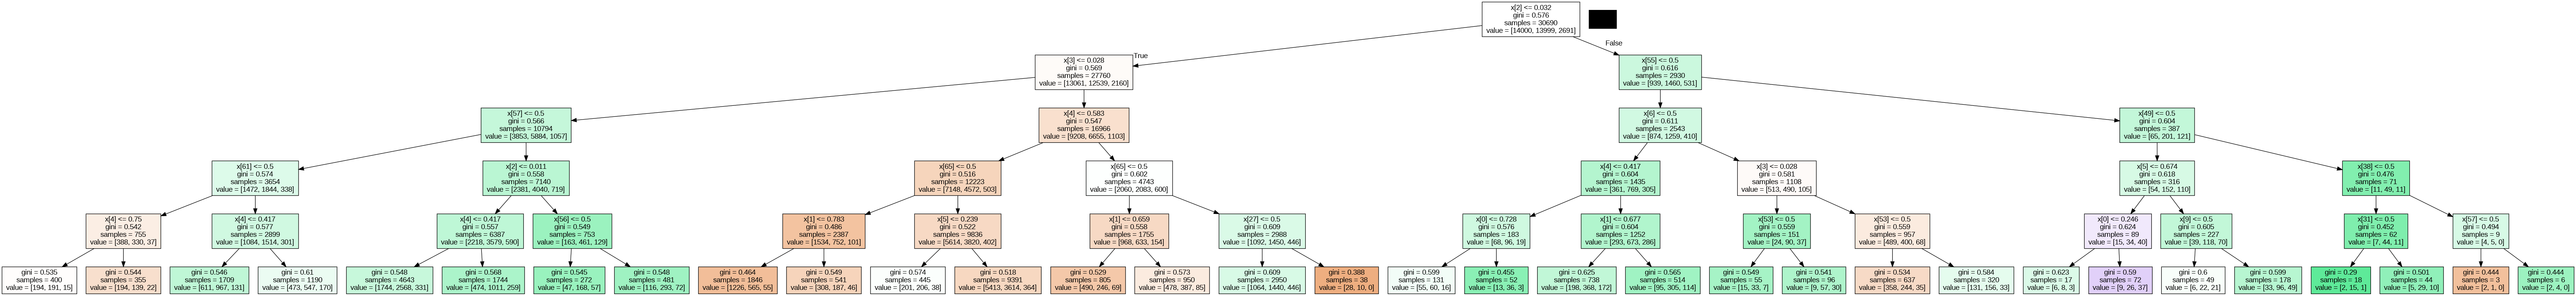

In [ ]:
try:
    import pydotplus
    pydotplus_installed = True

except:
    print('PyDotPlus must be installed to execute the remainder of the cells associated with this question.')
    print('Please see the instructions for this question for details.')
    pydotplus_installed = False
if pydotplus_installed:

    # Create an output destination for the file
    dot_data = StringIO()

    export_graphviz(GR.best_estimator_, out_file=dot_data, filled=True)
    graph = pydotplus.graph_from_dot_data(dot_data.getvalue())

    # View the tree image
    filename = 'Car_Accidents_tree_prune.png'
    graph.write_png(filename)
    img = Image(filename=filename)
    display(img)

else:
    print('This cell not executed because PyDotPlus could not be loaded.')

##Perceptron

In [ ]:
from sklearn.linear_model import Perceptron
from sklearn.metrics import cohen_kappa_score

clf = Perceptron(max_iter=100)
clf.fit(x_train, y_train)

accuracy = clf.score(x_test , y_test)
print( 'Accuracy is ', accuracy)
y_pred = clf.predict(x_test)
kappa = cohen_kappa_score(y_pred, y_test)
print('Choen_kappa_score', kappa)

Accuracy is  0.4430591455070701
Choen_kappa_score 0.03449005119879034


##Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Initialize empty lists to store OOB error and test set accuracy
oob_list = []
accuracy_list = []
RF = RandomForestClassifier(oob_score=True,
                            random_state=42,
                            warm_start=True,
                            n_jobs=-1)


# Iterate through all of the possibilities for number of trees
for n_trees in [15, 20, 30, 40, 50, 100, 150, 200, 300, 400]:
    # Use this to set the number of trees
    RF.set_params(n_estimators=n_trees)

    # Fit the model
    RF.fit(x_train, y_train)

    # Get the OOB error
    oob_error = 1 - RF.oob_score_

    # Store the OOB error
    oob_list.append(pd.Series({'n_trees': n_trees, 'oob': oob_error}))

    # Get the accuracy on the test set
    accuracy = RF.score(x_test, y_test)

    # Store the accuracy
    accuracy_list.append(pd.Series({'n_trees': n_trees, 'accuracy': accuracy}))

# Create DataFrames from the lists
rf_oob_df = pd.concat(oob_list, axis=1).T.set_index('n_trees')
rf_accuracy_df = pd.concat(accuracy_list, axis=1).T.set_index('n_trees')

# Print the DataFrames
print("OOB Error:")
print(rf_oob_df)
print("\nTest Set Accuracy:")
print(rf_accuracy_df)


OOB Error:
              oob
n_trees          
15.0     0.501825
20.0     0.497067
30.0     0.489964
40.0     0.487879
50.0     0.483610
100.0    0.475986
150.0    0.473346
200.0    0.473183
300.0    0.470544
400.0    0.469339

Test Set Accuracy:
         accuracy
n_trees          
15.0     0.508058
20.0     0.516421
30.0     0.518549
40.0     0.520374
50.0     0.519690
100.0    0.523947
150.0    0.526532
200.0    0.527140
300.0    0.528280
400.0    0.527064


[Text(0, 0.5, 'oob error')]

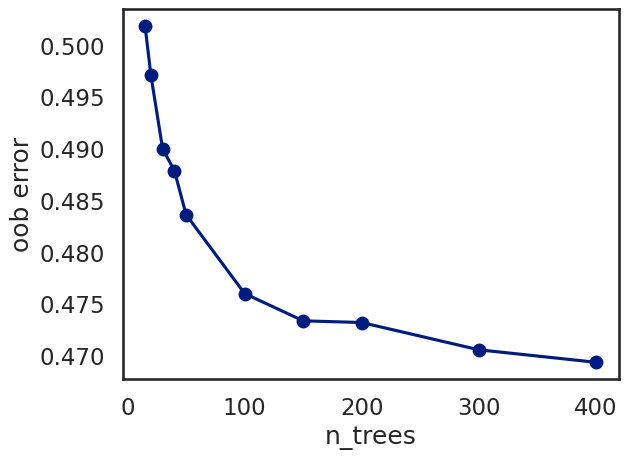

In [ ]:
rf_oob_df = pd.concat(oob_list, axis=1).T.set_index('n_trees')

sns.set_context('talk')
sns.set_palette('dark')
sns.set_style('white')

ax = rf_oob_df.plot(legend=False, marker='o')
ax.set(ylabel='oob error')

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier

# Initialize the random forest estimator
# Note that the number of trees is not setup here
EF = ExtraTreesClassifier(oob_score=True,
                          random_state=42,
                          warm_start=True,
                          bootstrap=True,
                          n_jobs=-1)

oob_list = list()
accuracy_list = []


# Iterate through all of the possibilities for
# number of trees
for n_trees in [15, 20, 30, 40, 50, 100, 150, 200, 300, 400]:

    # Use this to set the number of trees
    EF.set_params(n_estimators=n_trees)
    EF.fit(x_train, y_train)

    # oob error
    oob_error = 1 - EF.oob_score_
    oob_list.append(pd.Series({'n_trees': n_trees, 'oob': oob_error}))

    # Get the accuracy on the test set
    accuracy = EF.score(x_test, y_test)

    # Store the accuracy
    accuracy_list.append(pd.Series({'n_trees': n_trees, 'accuracy': accuracy}))

et_oob_df = pd.concat(oob_list, axis=1).T.set_index('n_trees')

# Create DataFrames from the lists
et_accuracy_df = pd.concat(accuracy_list, axis=1).T.set_index('n_trees')

# Print the DataFrames
print("OOB Error:")
print(et_oob_df)
print("\nTest Set Accuracy:")
print(et_accuracy_df)

OOB Error:
              oob
n_trees          
15.0     0.507429
20.0     0.504268
30.0     0.497328
40.0     0.494656
50.0     0.492310
100.0    0.487455
150.0    0.485142
200.0    0.483871
300.0    0.482796
400.0    0.483415

Test Set Accuracy:
         accuracy
n_trees          
15.0     0.496579
20.0     0.496807
30.0     0.502205
40.0     0.503193
50.0     0.503801
100.0    0.509123
150.0    0.510187
200.0    0.511327
300.0    0.510491
400.0    0.510263


In [ ]:
oob_df = pd.concat([rf_oob_df.rename(columns={'oob':'RandomForest'}),
                    et_oob_df.rename(columns={'oob':'ExtraTrees'})], axis=1)

oob_df

RandomForest  ExtraTrees
n_trees                          
15.0         0.501825    0.507429
20.0         0.497067    0.504268
30.0         0.489964    0.497328
40.0         0.487879    0.494656
50.0         0.483610    0.492310
100.0        0.475986    0.487455
150.0        0.473346    0.485142
200.0        0.473183    0.483871
300.0        0.470544    0.482796
400.0        0.469339    0.483415

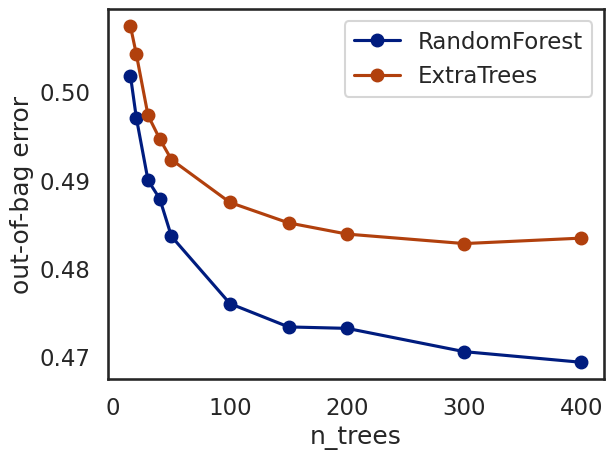

In [ ]:
sns.set_context('talk')
sns.set_palette('dark')
sns.set_style('white')

ax = oob_df.plot(marker='o')
ax.set(ylabel='out-of-bag error');

##Summary

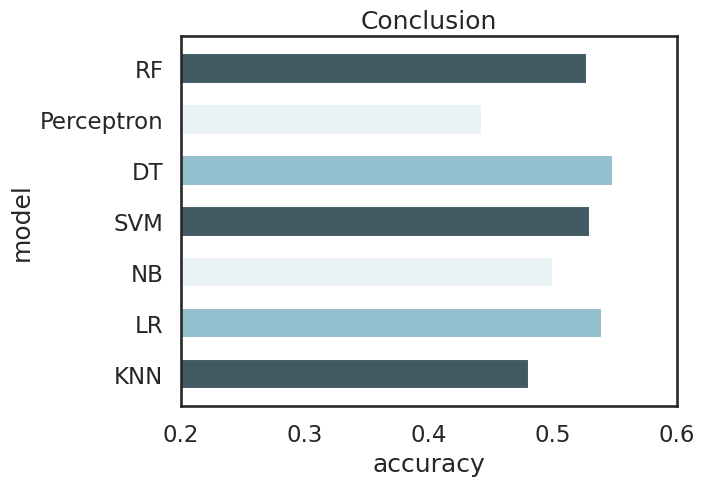

In [ ]:
# y-coordinates of bottom sides of bars
bottom = [1, 2, 3, 4, 5, 6, 7]

# widths of bars
width = [0.481, 0.54, 0.5, 0.53, 0.549, 0.443, 0.528]

# labels for bars
tick_label = ['KNN', 'LR', 'NB', 'SVM', 'DT', 'Perceptron', 'RF']

# plotting a horizontal bar chart
plt.barh(bottom, width, tick_label=tick_label,
         height=0.6, color=['#405962', '#93bfce', '#e9f2f5'])
plt.xlim(xmax=0.6, xmin=0.2)
# naming the y-axis
plt.ylabel('model')
# naming the x-axis
plt.xlabel('accuracy')
# plot title
plt.title('Conclusion')

# function to show the plot
plt.show()

Low success rates-> Trying other combination.